In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [47]:
data = load_iris().data
targets = load_iris().target

In [119]:
covariance = np.cov(data, rowvar=False)

means = np.mean(data, axis=0)
adjusted = np.subtract(data,means)
# 1/(N-1) * (X - X^)(X - X^)'
covariance = np.subtract(np.matmul(np.transpose(adjusted),adjusted),np.mean(adjusted,axis=0)) / (data.shape[0] -1)
print(covariance)


[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


For CCA and so on, the correlation matrix can be used instead. Here it's calculated as a diagonalization problem instead of the typical Corr(X,Y) = cov(X,Y)/||X^||

In [121]:
D = np.sqrt(np.diagonal(covariance) * np.identity(4))
D_inv = np.linalg.inv(D)
correlation = np.matmul(np.matmul(D_inv,covariance),D_inv)
print(correlation)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [127]:
# Get eigenvectors, already sorted on magnitude
val,vec = np.linalg.eig(covariance)
print(val)

[4.22484077 0.24224357 0.07852391 0.02368303]


In [128]:
num_components = 2

pcadata = np.zeros((num_components,150))
for i in range(num_components):
    # Remember to use X - X^ matrix as data, otherwise we don't project it porpperly.
    pcadata[i,:] = np.matmul(adjusted,vec[i])


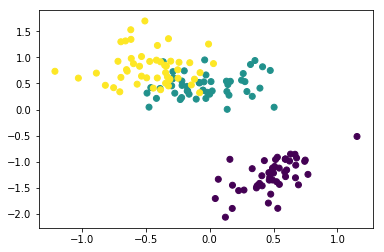

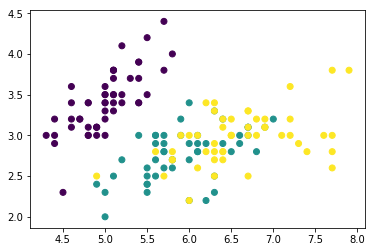

In [129]:
plt.scatter(pcadata[0,:],pcadata[1,:], c = targets)
plt.show()

plt.scatter(data[:,0], data[:,1], c = targets)
plt.show()